In [83]:

from sklearn import model_selection, metrics
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [84]:
def Read_data(data):
     return data.head()

data = pd.read_csv(r"C:\Users\mk744\OneDrive - Poornima University\Desktop\Automobile_data.csv")
Read_data(data)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

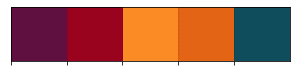

In [86]:
COLOR = 'black'
mpl.rcParams.update({'text.color' : COLOR,
                     'axes.labelcolor' : COLOR,
                     'xtick.color' : COLOR,
                     'ytick.color' : COLOR,
                     'axes.labelsize' : 18,
                     'axes.titlesize' : 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'axes.grid' : True,
                     'grid.color' : 'k',
                     'grid.alpha' : 0.4,
                     'grid.linestyle' : ':',
                     'grid.linewidth' : 0.5})

palette = ["#5f0f40","#9a031e","#fb8b24","#e36414","#0f4c5c"]
sns.palplot(sns.color_palette(palette))
plt.show()

In [87]:
def feature_analysis(data, col):
     data[col].value_counts().plot(kind = "pie", autopct = '%1.1f%%', figsize = (10, 10))
     return data[col].value_counts(dropna = False).to_frame(name = f"{col} #").style.bar(subset = f"{col} #", color = palette[4])

# 1 | Problem Definition
- Predict the price of the car based on the features in the dataset. Evaluation based on R2 score.

In [88]:
def Find_Columns(data):
     column_indices = {col: idx for idx, col in enumerate(data.columns)}
     return column_indices
print("The column indices are: ")
Find_Columns(data)

The column indices are: 


{'symboling': 0,
 'normalized-losses': 1,
 'make': 2,
 'fuel-type': 3,
 'aspiration': 4,
 'num-of-doors': 5,
 'body-style': 6,
 'drive-wheels': 7,
 'engine-location': 8,
 'wheel-base': 9,
 'length': 10,
 'width': 11,
 'height': 12,
 'curb-weight': 13,
 'engine-type': 14,
 'num-of-cylinders': 15,
 'engine-size': 16,
 'fuel-system': 17,
 'bore': 18,
 'stroke': 19,
 'compression-ratio': 20,
 'horsepower': 21,
 'peak-rpm': 22,
 'city-mpg': 23,
 'highway-mpg': 24,
 'price': 25}

In [89]:
TARGET = 'price'

In [90]:
def Target_impute(data):
     Target = 'price'
     return Target

def Sample(data):
     return  data.sample(5)

def Info(data):
     return  data.info()

def Null_values(data):
     return data.isnull().sum()

def Descriptive_stats(data):
     return data.describe()

Target_impute(data)
Sample(data)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
133,2,104,saab,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.3,110,5250,21,28,12170
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845
76,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389
34,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129
178,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161,5200,20,24,16558


In [91]:
Info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [92]:
Null_values(data)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [93]:
def Find_Missing_Values(data):
     for col in data.columns:
          nums_nan = len(data[data[col] == '?'])
          if  nums_nan > 0:
               print(f"{col} =  {nums_nan}")

Find_Missing_Values(data)

normalized-losses =  41
num-of-doors =  2
bore =  4
stroke =  4
horsepower =  2
peak-rpm =  2
price =  4


In [94]:
def Remove_All(data):
     return f"Data without '?': {len(data[(data != '?').all(axis=1)].index)/len(data.index)*100:.2f}%"

Remove_All(data)     

"Data without '?': 77.56%"

In [95]:
df_copy = data.copy()
cols_to_clean = ["price", "peak-rpm", "horsepower", "stroke", "bore"]
def remove_Nans(data, col):
     data[col] = data[col].replace('?', np.nan)
     data[col] = pd.to_numeric(data[col])
     return data[data[col].notna()]

for col in cols_to_clean:
     df_copy = remove_Nans(df_copy, col)

print(f"Data without '?': {len(df_copy.index) / len(data.index) * 100:.2f}%")

Data without '?': 95.12%


In [96]:
df0 = data.copy() 
col_to_clean = ["price", "peak-rpm", "horsepower", "stroke", "bore"]
def remove_nans(df, col):
    df[col] = df[col].replace('?',np.nan)
    df[col] = pd.to_numeric(df[col])
    return df[df[col].notna()]
     
for col in col_to_clean:
    df0 = remove_nans(df0, col)
    
print(f"Data without '?': {len(df0.index)/len(data.index)*100:.2f}%")
df0.info()

Data without '?': 95.12%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    object 
 2   make               195 non-null    object 
 3   fuel-type          195 non-null    object 
 4   aspiration         195 non-null    object 
 5   num-of-doors       195 non-null    object 
 6   body-style         195 non-null    object 
 7   drive-wheels       195 non-null    object 
 8   engine-location    195 non-null    object 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    object 
 15  num-of-cylinders   195 non-null    object 
 16  e

In [97]:
Descriptive_stats(data).T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [98]:
data.sample(10).T

,140,115,178,193,57,118,141,106,48,191
symboling,2,0,3,0,3,1,0,1,0,0
normalized-losses,83,161,197,?,150,119,102,231,?,?
make,subaru,peugot,toyota,volkswagen,mazda,plymouth,subaru,nissan,jaguar,volkswagen
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,std,std
num-of-doors,two,four,two,four,two,two,four,two,four,four
body-style,hatchback,sedan,hatchback,wagon,hatchback,hatchback,sedan,hatchback,sedan,sedan
drive-wheels,4wd,rwd,rwd,fwd,rwd,fwd,fwd,rwd,rwd,fwd
engine-location,front,front,front,front,front,front,front,front,front,front
wheel-base,93.3,107.9,102.9,100.4,95.3,93.7,97.2,99.2,113.0,100.4


In [99]:
data.describe(include= 'object').T

,count,unique,top,freq
normalized-losses,205,52,?,41
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159


,make #
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11
dodge,9


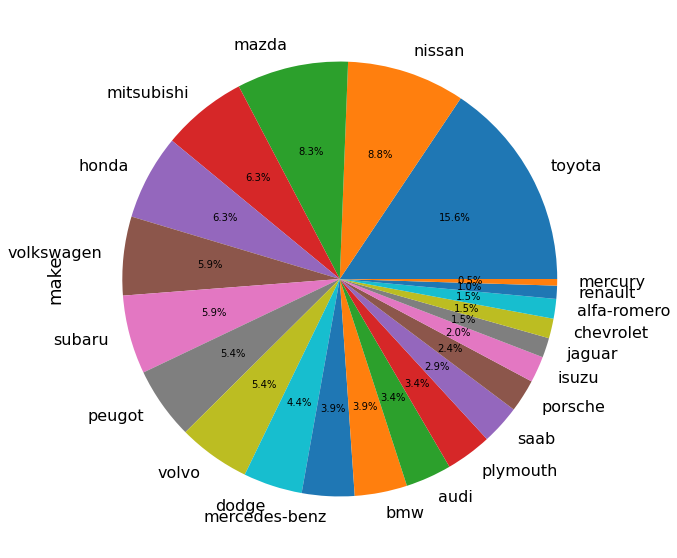

In [100]:
feature_analysis(data, 'make')

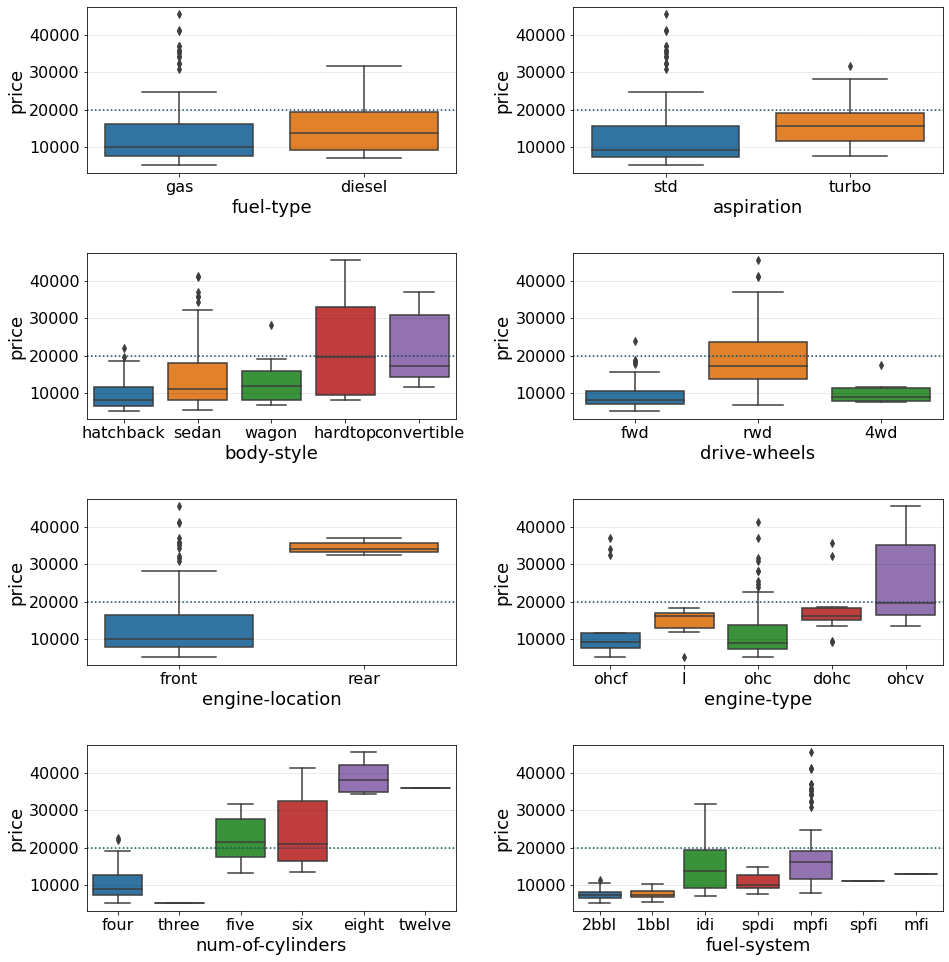

In [101]:
plt.figure(figsize=(14,14))
for index, feature in enumerate(df0.describe(include=object).T.index[1:].drop(['make', 'num-of-doors'])):
    plt.subplot(4, 2, index+1)
    plt.tight_layout(pad=3.0)
    plt.axhline(y = 20_000, color = palette[4], linestyle = ':' )
    sns.boxplot(x=feature, y="price", data=pd.concat([df0['price'], df0[feature]], axis=1).sort_values(by = "price"))
    
plt.show()

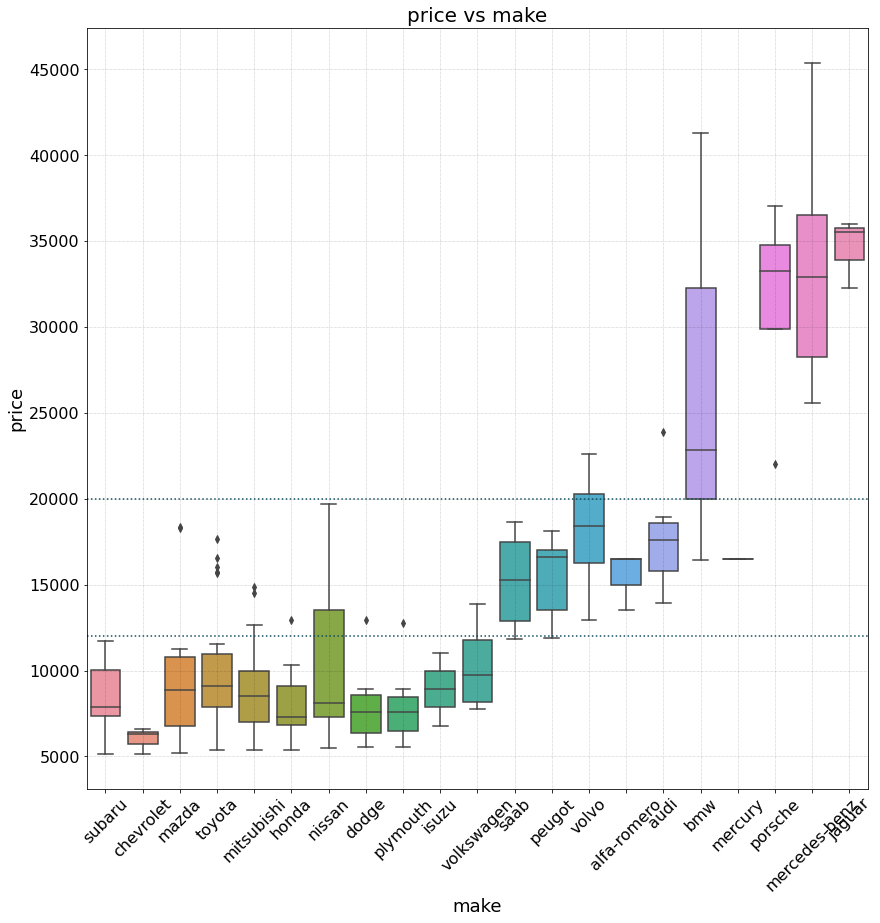

In [102]:
_, ax = plt.subplots(figsize=(14, 14))

sns.boxplot(x='make', y="price", data=pd.concat([df0['price'], df0['make']], axis=1).sort_values(by = "price"))
ax.axhline(y = 20_000, color = palette[4], linestyle = ':' )
ax.axhline(y = 12_000, color = palette[4], linestyle = ':' )
plt.grid(True, alpha = 0.4, linestyle = ':')
plt.xticks(rotation=45)
plt.title("price vs make", fontsize = 20)
plt.show()

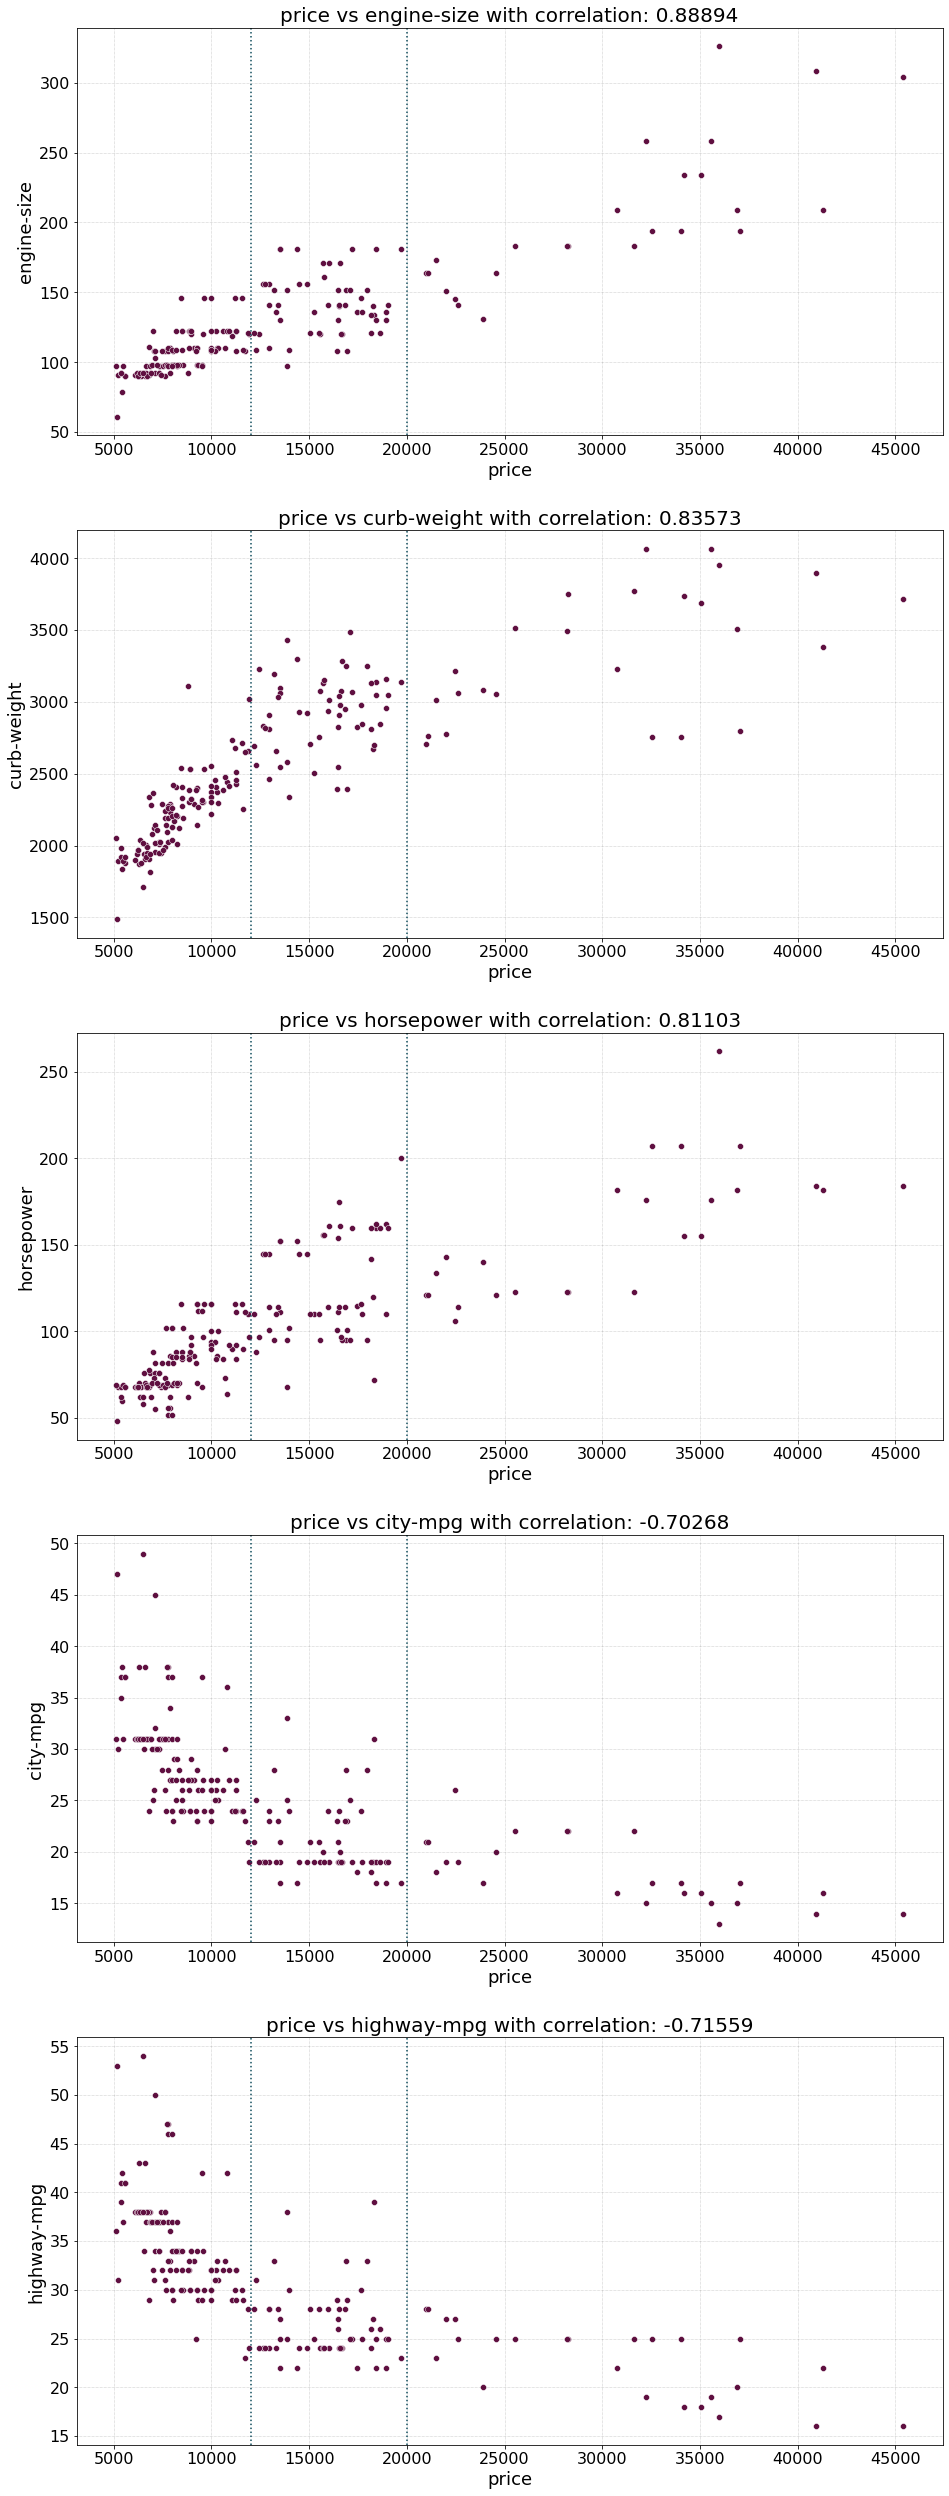

In [103]:
plt.figure(figsize=(14,35))
high_corr_col = ["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg"]

for index, (feature, corr_feature) in enumerate(zip(high_corr_col, df0.select_dtypes(include=np.number).corr()['price'].sort_values(ascending=False).to_frame().T[["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg"]].values[0])):
    plt.subplot(len(high_corr_col), 1, index+1)
    plt.tight_layout(pad=3.0)
    plt.title(f"price vs {feature} with correlation: {corr_feature:.5f}", fontsize = 20)
    plt.axvline(x = 12_000, color = palette[4], linestyle = ':' )
    plt.axvline(x = 20_000, color = palette[4], linestyle = ':' )
    plt.grid(True, alpha = 0.4, linestyle = ':')
    sns.scatterplot(data=df0, x='price', y=feature, color = palette[0])
    
plt.show()

# Correlation between numerical features

In [104]:
df_all_corr = df0.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1":"Feature 2", 0:"Correlation_Coefficient"}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'price']

,Feature 1,Feature 2,Correlation_Coefficient
14,price,price,1.000000
18,price,engine-size,0.888942
31,price,curb-weight,0.835729
42,price,horsepower,0.811027
50,price,width,0.754273
58,price,highway-mpg,0.715590
62,price,city-mpg,0.702685
64,price,length,0.695331
85,price,wheel-base,0.585793
97,price,bore,0.546873


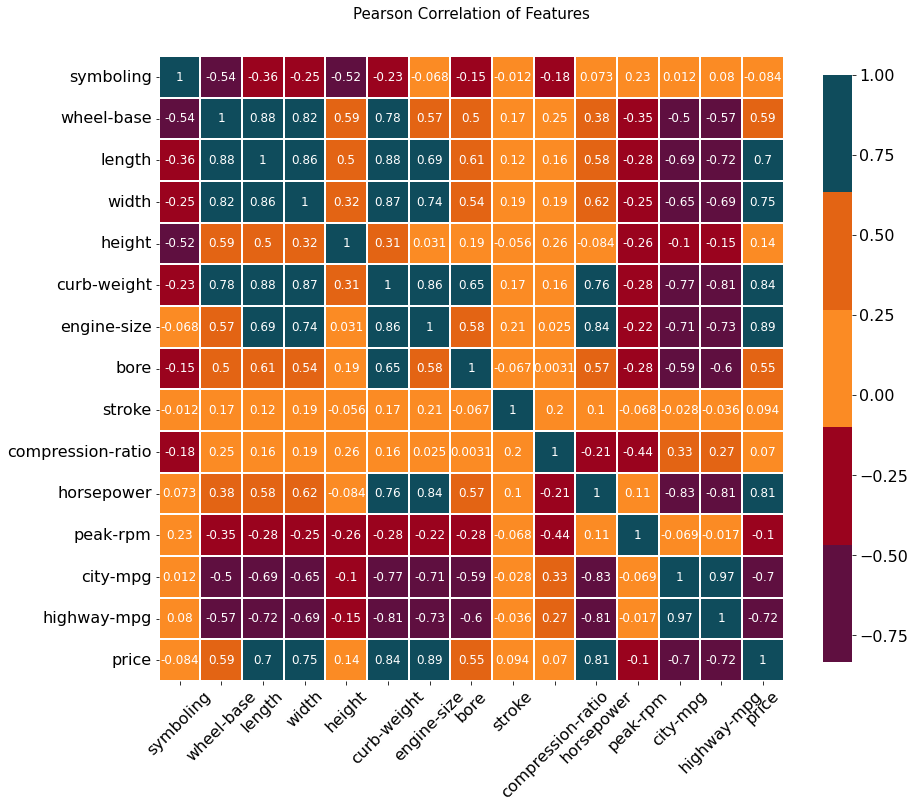

In [105]:
_ , ax = plt.subplots(figsize =(14, 12))

_ = sns.heatmap(
    df0.corr(), 
    cmap = palette,
    square=True, 
    cbar_kws={'shrink':.9 }, 
    ax=ax,
    annot=True, 
    linewidths=0.1,vmax=1.0, linecolor='white',
    annot_kws={'fontsize':12 }
)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

plt.xticks(rotation=45)
plt.show()

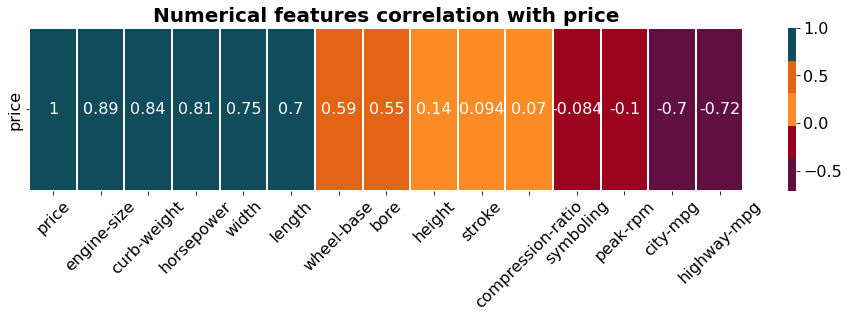

In [106]:
_,ax = plt.subplots(figsize=(16,3))
sns.heatmap(df0.select_dtypes(include=np.number).corr()['price'].sort_values( ascending=False).to_frame().T, 
            cmap = palette,
            annot=True, 
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':16 }
)

plt.title("Numerical features correlation with price", weight='bold', fontsize=20)
plt.xticks(rotation=45)
plt.show()

# Initial Model Hypothesis
- Problem Type : Regression
- Machine Learning Regression Algorithms:
- Linear Regression
- Polynomial Regression
- Lasso Regression
- Decision Tree Regression
- Random Forest Regression
- Gaussian  Process Regression


In [107]:
def Model_columns(df0):
     model_col = [TARGET, 'engine-size', 'curb-weight',
                  'horsepower', 'city-mpg', 'highway-mpg', 'make'
                  ]
     df_model =  df0[model_col].copy()
     df_model = df_model.sample(10).T
     return df_model

Ans =  Model_columns(df0)
Ans



,99,33,22,140,203,93,77,123,83,96
price,8949.0,6529.0,6377.0,7603.0,22470.0,7349.0,6189.0,8921.0,14869.0,7499.0
engine-size,120,92,90,108,145,97,92,122,156,97
curb-weight,2324,1940,1876,2240,3217,2024,1944,2535,2921,1971
horsepower,97,76,68,73,106,69,68,88,145,69
city-mpg,27,30,31,26,26,31,31,24,19,31
highway-mpg,34,34,38,31,27,37,38,30,24,37
make,nissan,honda,dodge,subaru,volvo,nissan,mitsubishi,plymouth,mitsubishi,nissan


In [108]:
model_col = [TARGET, "engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg", "make"]
df_model = df0[model_col].copy()
df_model.sample(10).T

,8,17,70,36,101,62,123,41,16,132
price,23875.0,36880.0,31600.0,7295.0,13499.0,10245.0,8921.0,12945.0,41315.0,11850.0
engine-size,131,209,183,92,181,122,122,110,209,121
curb-weight,3086,3505,3770,2024,3095,2410,2535,2465,3380,2658
horsepower,140,182,123,76,152,84,88,101,182,110
city-mpg,17,15,22,30,17,26,24,24,16,21
highway-mpg,20,20,25,34,22,32,30,28,22,28
make,audi,bmw,mercedes-benz,honda,nissan,mazda,plymouth,honda,bmw,saab


# Train Test Split

In [109]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    df_model.drop([TARGET], axis=1), 
    df_model[TARGET], 
    test_size = 0.20, 
    random_state = 0xBEEF
)

X_train_wout = X_train_w.copy().drop(["make"], axis=1)
X_test_wout = X_test_w.copy().drop(["make"], axis=1)
y_train_wout = y_train_w.copy()
y_test_wout = y_test_w.copy()

X_train_wout.shape

(156, 5)

In [110]:
ecars = df_model["make"].loc[df_model['price'] > 25000].unique()
ecars

array(['bmw', 'jaguar', 'mercedes-benz', 'porsche'], dtype=object)

In [111]:
Ecars = df_model['make'].loc[df_model['price'] > 20000].unique()
Ecars

array(['audi', 'bmw', 'jaguar', 'mercedes-benz', 'porsche', 'volvo'],
      dtype=object)

In [112]:
df_model[df_model['make'].isin(ecars)].sample(10)

,price,engine-size,curb-weight,horsepower,city-mpg,highway-mpg,make
125,22018.0,151,2778,143,19,27,porsche
71,34184.0,234,3740,155,16,18,mercedes-benz
10,16430.0,108,2395,101,23,29,bmw
14,24565.0,164,3055,121,20,25,bmw
48,35550.0,258,4066,176,15,19,jaguar
72,35056.0,234,3685,155,16,18,mercedes-benz
74,45400.0,304,3715,184,14,16,mercedes-benz
15,30760.0,209,3230,182,16,22,bmw
49,36000.0,326,3950,262,13,17,jaguar
12,20970.0,164,2710,121,21,28,bmw


In [113]:
idx = df_model[df_model['make'].isin(ecars)].index
idx

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  47,  48,  49,  67,  68,
             69,  70,  71,  72,  73,  74, 125, 126, 127, 128],
           dtype='int64')

In [114]:
df_model.loc[idx].sample(10)

,price,engine-size,curb-weight,horsepower,city-mpg,highway-mpg,make
68,28248.0,183,3750,123,22,25,mercedes-benz
14,24565.0,164,3055,121,20,25,bmw
10,16430.0,108,2395,101,23,29,bmw
128,37028.0,194,2800,207,17,25,porsche
49,36000.0,326,3950,262,13,17,jaguar
11,16925.0,108,2395,101,23,29,bmw
127,34028.0,194,2756,207,17,25,porsche
67,25552.0,183,3515,123,22,25,mercedes-benz
17,36880.0,209,3505,182,15,20,bmw
74,45400.0,304,3715,184,14,16,mercedes-benz


In [115]:
df_model[~df_model['make'].isin(ecars)].sample(10)

,price,engine-size,curb-weight,horsepower,city-mpg,highway-mpg,make
87,9279.0,110,2403,116,23,30,mitsubishi
52,6795.0,91,1905,68,31,38,mazda
165,9298.0,98,2265,112,26,29,toyota
203,22470.0,145,3217,106,26,27,volvo
178,16558.0,171,2976,161,20,24,toyota
184,7995.0,97,2264,52,37,46,volkswagen
97,7999.0,97,2037,69,31,37,nissan
134,15040.0,121,2707,110,21,28,saab
137,18620.0,121,2847,160,19,26,saab
173,8948.0,122,2326,92,29,34,toyota


In [116]:
class WithSplitLinearRegression:
    def __init__(self, 
                 ecars, 
                 elr_params = {}, 
                 clr_params = {}
                 ):
        self.ecars = ecars
        self.elr_params = elr_params
        self.clr_params = clr_params
    
    def fit(self, X_train, y_train):
        ecars_indx = self.get_index(X_train)
        X_train = X_train.drop(["make"], axis = 1)
        
        self.elr = LinearRegression(**self.elr_params).fit(
            X = X_train.loc[ecars_indx], 
            y = y_train.loc[ecars_indx]
        )
        
        self.clr = LinearRegression(**self.clr_params).fit(
            X = X_train[~X_train.index.isin(ecars_indx)], 
            y = y_train[~y_train.index.isin(ecars_indx)]
        ) 
        return self
    
    def predict(self, X_test):
        ecars_indx = self.get_index(X_test)
        X_test = X_test.drop(["make"], axis = 1)

        y_elr = self.elr.predict(X_test.loc[ecars_indx])
        y_clr = self.clr.predict(X_test[~X_test.index.isin(ecars_indx)])
        
        return y_elr, y_clr
    
    def get_index(self, X):
        return X[X["make"].isin(self.ecars)].index

In [117]:
lr_params = {}
lr = LinearRegression(**lr_params).fit(X_train_wout, y_train_wout)
predictions_wout = lr.predict(X_test_wout)
r2_score_wout = r2_score(y_test_wout, predictions_wout)
print(f"r2_score is : {r2_score_wout}")

r2_score is : 0.7326577312077346


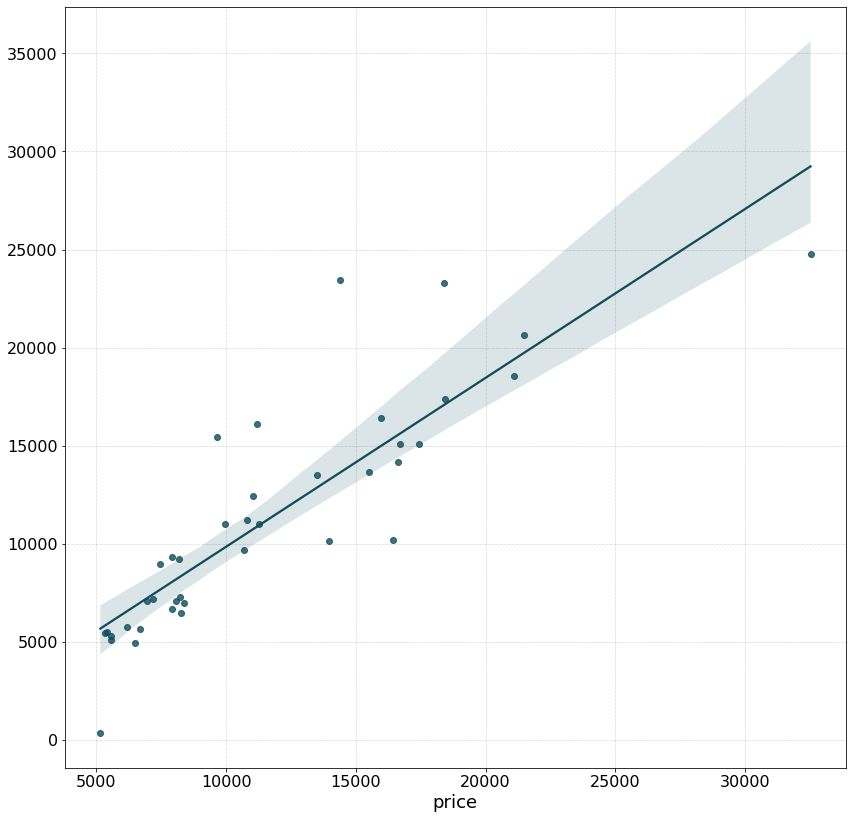

In [118]:
_ , ax = plt.subplots(figsize =(14, 14))
sns.regplot(
    x = y_test_wout, 
    y = predictions_wout,
    ax = ax,
    color = palette[4] 
)
plt.show()

In [119]:
ECars = df_model['make'].loc[df_model['price'] > 25000].unique()
ECars

array(['bmw', 'jaguar', 'mercedes-benz', 'porsche'], dtype=object)

In [120]:
elr_params = {}
clr_params = {}

wslr = WithSplitLinearRegression(
    ecars = ecars, 
    elr_params = elr_params, 
    clr_params = clr_params
).fit(X_train_w, y_train_w)

In [121]:
y_pred_e, y_pred_c = wslr.predict(X_test_w)

In [122]:
ecars_indx = wslr.get_index(X_test_w)

r2_score_elr = r2_score(y_test_w.loc[ecars_indx], y_pred_e)
r2_score_clr = r2_score(y_test_w[~y_test_w.index.isin(ecars_indx)], y_pred_c)

print(f"elr r2_score is : {r2_score_elr}")
print(f"clr r2_score is : {r2_score_clr}")

elr r2_score is : 0.8302100259820815
clr r2_score is : 0.8307257698533321


In [123]:
r2_score_elr = r2_score(y_test_w.loc[ecars_indx], y_pred_e)
r2_score_clr = r2_score(y_test_w[~y_test_w.index.isin(ecars_indx)], y_pred_c)

print(f"elr r2_score is : {r2_score_elr}")
print(f"clr r2_score is : {r2_score_clr}")

elr r2_score is : 0.8302100259820815
clr r2_score is : 0.8307257698533321


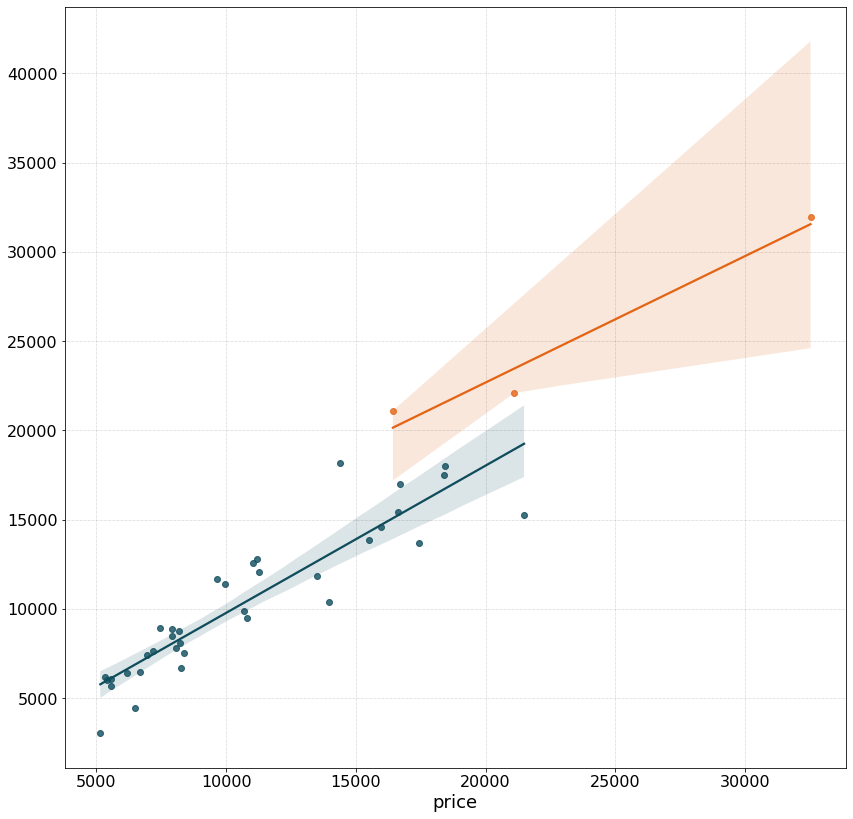

In [124]:
_ , ax = plt.subplots( figsize =(14, 14))

sns.regplot(
    x = y_test_w.loc[ecars_indx], 
    y = y_pred_e,
    ax = ax,
    color = palette[3]
)

sns.regplot(
    x = y_test_w[~y_test_w.index.isin(ecars_indx)], 
    y = y_pred_c,
    ax = ax,
    color = palette[4] 
)
plt.show()

In [125]:
print("Model without split on make:")
print(f"\tr2_score is : {r2_score_wout}\n")

print("Model with split on make:")
print(f"\telr r2_score is : {r2_score_elr}")
print(f"\tclr r2_score is : {r2_score_clr}")

Model without split on make:
	r2_score is : 0.7326577312077346

Model with split on make:
	elr r2_score is : 0.8302100259820815
	clr r2_score is : 0.8307257698533321
